In [1]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

## Cleaning data

In [3]:
df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [6]:
df.fillna(modes,inplace=True)

In [7]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

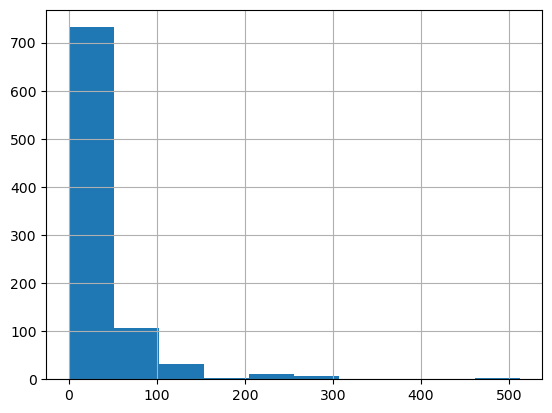

In [9]:
df['Fare'].hist()

In [10]:
df['LogFare'] = np.log(df['Fare']+1)

<Axes: >

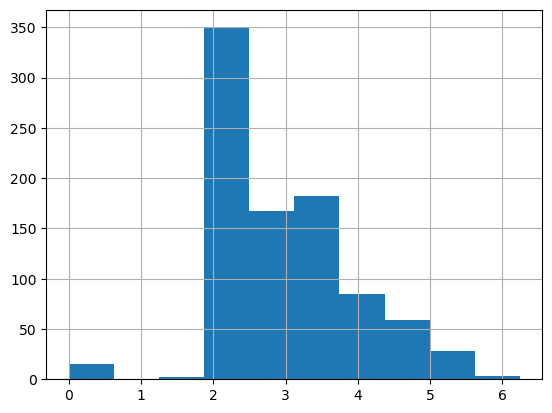

In [11]:
df['LogFare'].hist()

In [12]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [13]:

pclasses = sorted(df['Pclass'].unique())
pclasses

[1, 2, 3]

In [14]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [15]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [16]:
df = pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,True,False,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,True,False,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,True,False,True,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,False,True,False,False,True,False,False,True


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [18]:
added_columns = ['Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_columns]

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True,False,False,True
1,True,False,True,False,False,True,False,False
2,True,False,False,False,True,False,False,True
3,True,False,True,False,False,False,False,True
4,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...
886,False,True,False,True,False,False,False,True
887,True,False,True,False,False,False,False,True
888,True,False,False,False,True,False,False,True
889,False,True,True,False,False,True,False,False


In [19]:
d = {True:1,False:0}
df[added_columns] = df[added_columns].map(d.get)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


In [75]:
from torch import tensor

In [76]:
t_dep = tensor(df.Survived)

In [77]:
indep_cols = ['Age','SibSp', 'Parch','LogFare'] + added_columns


In [78]:
t_indep = tensor(df[indep_cols].values,dtype=torch.float)

In [79]:
t_dep.shape, t_indep.shape

(torch.Size([891]), torch.Size([891, 12]))

In [80]:
len(t_indep.shape)

2

In [81]:
t_indep.shape[1]

12

In [82]:
22.0000*-0.31165639

-6.85644058

In [83]:
torch.manual_seed(442)

n_coeffs = t_indep.shape[1]
coeffs = torch.rand(n_coeffs)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [84]:
t_indep*coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.0000,  -0.3147,   0.0000

In [85]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep/vals

In [86]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [87]:
preds = (t_indep*coeffs).sum(axis=1)
preds

tensor([     0.1412,     -0.5725,      0.1494,      0.2571,      0.0453,     -0.0448,      0.0792,      0.2961,      0.2128,     -0.5770,
             0.3093,      0.1311,      0.1321,      0.1942,      0.2191,     -0.0081,      0.1499,      0.1269,      0.1104,     -0.6378,
             0.0394,      0.0690,      0.0604,      0.2430,      0.3128,      0.2513,     -0.6892,      0.3557,      0.0089,      0.1096,
            -0.6194,     -0.5173,      0.0095,     -0.1090,     -0.5712,      0.1658,     -0.6892,      0.1263,      0.2029,     -0.5770,
             0.0799,      0.1619,     -0.6921,     -0.4445,      0.0379,      0.1090,     -0.0477,      0.0095,     -0.6913,      0.1860,
             0.2623,      0.1274,     -0.6388,      0.1429,     -0.7523,      0.2662,      0.2028,     -0.7153,      0.3598,      0.2907,
            -0.6777,      0.2078,      0.1316,      0.3149,     -0.5268,     -0.6564,      0.1565,      0.1375,      0.3511,      0.1297,
             0.0877,      0.3133, 

In [88]:
loss = torch.abs(t_dep-preds).mean()
loss

tensor(0.5200)

In [89]:
def calc_preds(coeffs,t_indep): return  (t_indep*coeffs).sum(axis=1)
def calc_loss(coeffs,t_indep,t_dep): return torch.abs(t_dep-calc_preds(coeffs,t_indep)).mean()

## Gardient decent step

In [90]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [91]:
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [99]:
loss = calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.5200, grad_fn=<MeanBackward0>)

In [100]:
loss.backward()

In [94]:
coeffs.grad

tensor([-0.0483,  0.0118, -0.0041, -0.0804, -0.1975,  0.1111, -0.1235, -0.0426,  0.0797, -0.1886, -0.0617,  0.1639])

In [103]:
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    print(calc_loss(coeffs,t_indep,t_dep))

tensor(0.4809)


## Training linear model

In [104]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed=42)(df)

In [105]:
len(trn_split), len(val_split)

(713, 178)

In [106]:
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305,701,812,76,50,387,47,516,564,434,117...]

In [107]:
trn_split

(#713) [788,525,821,253,374,98,215,313,281,305,701,812,76,50,387,47,516,564,434,117...]

In [108]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]

In [109]:
len(trn_indep), len(val_indep)

(713, 178)

In [110]:
def update_coeffs(coeffs,lr): return coeffs.sub_(coeffs.grad*lr)

def one_epoch(coeffs,lr):
    loss = calc_loss(coeffs, t_indep, t_dep)
    loss.backward()
    with torch.no_grad():update_coeffs(coeffs, lr)
    print(f'{loss: 3f}',end=';')

def init_coeff():return (torch.rand(n_coeffs)-0.5).requires_grad_()


def train_model(epochs=30,lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeff()
    for epoch in range(epochs):one_epoch(coeffs,lr)
    return coeffs

In [111]:
coeffs = train_model(18,lr=0.2)

 0.520034; 0.492249; 0.452860; 0.386220; 0.325098; 0.299565; 0.357401; 0.424809; 0.465698; 0.462533; 0.432905; 0.388570; 0.357540; 0.345908; 0.369752; 0.404256; 0.444041; 0.451081;

In [112]:
def show_coeffs(): return dict(zip(indep_cols,coeffs.requires_grad_(False)))

In [113]:
show_coeffs()

{'Age': tensor(-0.2098),
 'SibSp': tensor(-0.4526),
 'Parch': tensor(-0.1427),
 'LogFare': tensor(-0.2445),
 'Sex_female': tensor(-0.1025),
 'Sex_male': tensor(-0.2301),
 'Pclass_1': tensor(0.2295),
 'Pclass_2': tensor(0.8698),
 'Pclass_3': tensor(0.2271),
 'Embarked_C': tensor(0.3680),
 'Embarked_Q': tensor(-0.2676),
 'Embarked_S': tensor(0.2786)}

## Measuring accuracy

In [114]:
preds = calc_preds(coeffs, val_indep)
preds

tensor([ 0.3352, -0.4184,  0.2195,  0.7022,  0.7493,  0.6514,  0.3538,  0.8690, -0.2091,  0.2259,  0.1059,  0.1125,  0.0870, -0.2915,
         0.1075,  0.0300, -0.0224,  0.8274,  0.6869,  0.2329,  0.1270,  0.0012,  0.1275,  0.6517,  0.1414, -0.5164,  0.2224, -0.0146,
         0.1422, -0.2909,  0.8477, -0.1208,  0.1401,  0.1093,  0.3195, -0.0121,  0.0154,  0.2654,  0.1264,  0.1953,  0.7728,  0.1264,
         0.6458,  0.2407,  0.1369,  0.0315,  0.0487,  0.0051, -0.4147,  0.2628, -0.6735, -0.2300, -0.1581,  0.1283,  0.7544,  0.7387,
        -0.4185,  0.0147,  0.1342,  0.0896,  0.1571,  0.0927, -0.0664,  0.1348,  0.7447,  0.0282,  0.7519,  0.0470, -0.5657,  0.8230,
         0.1218,  0.2729,  0.7413,  0.1205,  0.0860,  0.1485,  0.1264, -0.0550,  0.7650,  0.6864,  0.6342,  0.0608,  0.1297,  0.1300,
         0.8190,  0.6910,  0.0795,  0.0767,  0.8792,  0.7546,  0.1040,  0.1264,  0.2331,  0.2038,  0.2358,  0.8103,  0.6685, -0.4440,
        -0.2857, -0.4006,  0.0626, -0.2909,  0.1061,  0.1113, 

In [115]:
results = val_dep.bool() == (preds>0.5)

In [116]:
results.float().mean()

tensor(0.5843)

In [117]:
def acc(coeffs):return (val_dep.bool() == (calc_preds(coeffs, val_indep)>0.5)).float().mean()

## Using sigmoid

In [118]:
preds[0:28]

tensor([ 0.3352, -0.4184,  0.2195,  0.7022,  0.7493,  0.6514,  0.3538,  0.8690, -0.2091,  0.2259,  0.1059,  0.1125,  0.0870, -0.2915,
         0.1075,  0.0300, -0.0224,  0.8274,  0.6869,  0.2329,  0.1270,  0.0012,  0.1275,  0.6517,  0.1414, -0.5164,  0.2224, -0.0146])

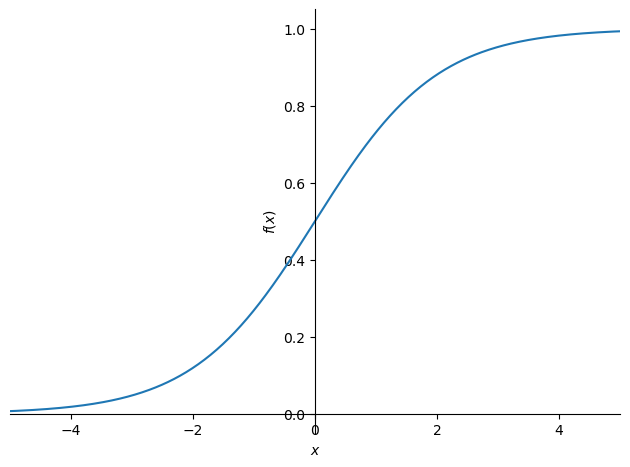

In [119]:
import sympy
x = sympy.symbols('x')
exp = 1/(1+sympy.exp(-x))


sympy.plot(exp,xlim=(-5,5))

In [120]:
def calc_preds(coeffs, indep): return torch.sigmoid((indep*coeffs).sum(axis=1))

In [121]:
coeffs = train_model(lr=0.2)

 0.504017; 0.499833; 0.491464; 0.478977; 0.462646; 0.443119; 0.421521; 0.399367; 0.378231; 0.359318; 0.343193; 0.329805; 0.318708; 0.309308; 0.301041; 0.293451; 0.286221; 0.279161; 0.272185; 0.265282; 0.258493; 0.251889; 0.245553; 0.239568; 0.234008; 0.228932; 0.224376; 0.220354; 0.216858; 0.213860;

In [122]:
acc(coeffs)

tensor(0.8258)

In [123]:
show_coeffs()

{'Age': tensor(-1.0065),
 'SibSp': tensor(-0.0624),
 'Parch': tensor(0.2741),
 'LogFare': tensor(-0.0445),
 'Sex_female': tensor(3.4509),
 'Sex_male': tensor(-5.2843),
 'Pclass_1': tensor(2.0146),
 'Pclass_2': tensor(0.7997),
 'Pclass_3': tensor(-2.9887),
 'Embarked_C': tensor(0.3308),
 'Embarked_Q': tensor(0.1528),
 'Embarked_S': tensor(-1.6054)}

## Submitting to kaggle

In [61]:
tst_df = pd.read_csv('titanic/test.csv')

In [62]:
tst_df['Fare'].isna().sum() 

1

In [63]:
tst_df['Fare'] = tst_df['Fare'].fillna(0)

In [64]:
tst_df.fillna(modes,inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df,columns = ['Sex','Pclass','Embarked'])
tst_df[added_columns] = tst_df[added_columns].map(d.get)

tst_indep = tensor(tst_df[indep_cols].values,dtype=torch.float)
tst_indep = tst_indep/vals

In [65]:
tst_df['Survived'] = (calc_preds(tst_indep,coeffs)>0.5).int()

In [66]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv',index=False)

In [67]:
!head sub.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


## Using matrix product

In [124]:
(val_indep*coeffs).sum(axis=1)

tensor([  4.0829,  -8.4375,  -8.2592,  -6.3473,  -6.4234,  -6.5477,   0.7693,   2.2740,  -9.8662,   0.5064, -10.2966,  -8.2262,  -9.9086,
          0.2975, -10.3205,  -5.4650,  -5.7166,   2.3527,  -6.6042,  -1.5495, -10.1959,  -5.6034,   5.3097,   2.0949, -10.1449,  -8.4529,
         -1.1357,  -5.6789, -10.1085,   0.2976,   2.4912,  -1.3197, -10.1330, -10.2778,   4.0075,  -1.1330,  -5.4919,   5.4639, -10.1961,
         -1.4812,  -6.3465, -10.1961,  -6.4814,   5.3626, -10.1457,  -1.4571, -10.2344, -10.1163,  -8.4369,  -1.4351,  -3.7183,  -9.9668,
         -9.9563, -10.2078,  -6.4346,  -6.5101,  -8.4375, -10.3591, -10.1583, -10.2572,  -3.3404, -10.1150,  -5.9062, -10.1582,   2.0602,
         -5.1248,  -6.4108, -10.3921,  -8.6055,   2.0599, -10.2211,   0.5625,  -6.4975, -10.1971,  -5.2006, -10.0952, -10.1961,  -5.3932,
         -6.3479,  -6.7012,  -6.0989,   5.5680, -10.1834, -10.1954,   1.9986,  -4.4116,  -3.2068,   3.7332,   4.1983,  -6.3983, -10.2970,
        -10.1961,   5.3854,  -8.33

In [125]:
coeffs

tensor([-1.0065, -0.0624,  0.2741, -0.0445,  3.4509, -5.2843,  2.0146,  0.7997, -2.9887,  0.3308,  0.1528, -1.6054])

In [128]:
(val_indep*coeffs).sum(axis=1)

tensor([  4.0829,  -8.4375,  -8.2592,  -6.3473,  -6.4234,  -6.5477,   0.7693,   2.2740,  -9.8662,   0.5064, -10.2966,  -8.2262,  -9.9086,
          0.2975, -10.3205,  -5.4650,  -5.7166,   2.3527,  -6.6042,  -1.5495, -10.1959,  -5.6034,   5.3097,   2.0949, -10.1449,  -8.4529,
         -1.1357,  -5.6789, -10.1085,   0.2976,   2.4912,  -1.3197, -10.1330, -10.2778,   4.0075,  -1.1330,  -5.4919,   5.4639, -10.1961,
         -1.4812,  -6.3465, -10.1961,  -6.4814,   5.3626, -10.1457,  -1.4571, -10.2344, -10.1163,  -8.4369,  -1.4351,  -3.7183,  -9.9668,
         -9.9563, -10.2078,  -6.4346,  -6.5101,  -8.4375, -10.3591, -10.1583, -10.2572,  -3.3404, -10.1150,  -5.9062, -10.1582,   2.0602,
         -5.1248,  -6.4108, -10.3921,  -8.6055,   2.0599, -10.2211,   0.5625,  -6.4975, -10.1971,  -5.2006, -10.0952, -10.1961,  -5.3932,
         -6.3479,  -6.7012,  -6.0989,   5.5680, -10.1834, -10.1954,   1.9986,  -4.4116,  -3.2068,   3.7332,   4.1983,  -6.3983, -10.2970,
        -10.1961,   5.3854,  -8.33

In [127]:
val_indep@coeffs

tensor([  4.0829,  -8.4375,  -8.2592,  -6.3473,  -6.4234,  -6.5477,   0.7693,   2.2740,  -9.8662,   0.5064, -10.2966,  -8.2262,  -9.9086,
          0.2975, -10.3205,  -5.4650,  -5.7166,   2.3527,  -6.6042,  -1.5495, -10.1959,  -5.6034,   5.3097,   2.0949, -10.1449,  -8.4529,
         -1.1357,  -5.6789, -10.1085,   0.2976,   2.4912,  -1.3197, -10.1330, -10.2778,   4.0075,  -1.1330,  -5.4919,   5.4639, -10.1961,
         -1.4812,  -6.3465, -10.1961,  -6.4814,   5.3626, -10.1457,  -1.4571, -10.2344, -10.1163,  -8.4369,  -1.4351,  -3.7183,  -9.9668,
         -9.9563, -10.2078,  -6.4346,  -6.5101,  -8.4375, -10.3591, -10.1583, -10.2572,  -3.3404, -10.1150,  -5.9062, -10.1582,   2.0602,
         -5.1248,  -6.4108, -10.3921,  -8.6055,   2.0599, -10.2211,   0.5625,  -6.4975, -10.1971,  -5.2006, -10.0952, -10.1961,  -5.3932,
         -6.3479,  -6.7012,  -6.0989,   5.5680, -10.1834, -10.1954,   1.9986,  -4.4116,  -3.2068,   3.7332,   4.1983,  -6.3983, -10.2970,
        -10.1961,   5.3854,  -8.33

In [129]:
def calc_preds(coeffs,indeps): return torch.sigmoid(indeps@coeffs)

In [130]:
def init_coeffs(): return (torch.rand(n_coeffs,1)*0.1).requires_grad_()

In [131]:
init_coeffs()

tensor([[0.0672],
        [0.0732],
        [0.0142],
        [0.0499],
        [0.0317],
        [0.0259],
        [0.0549],
        [0.0587],
        [0.0447],
        [0.0813],
        [0.0351],
        [0.0245]], requires_grad=True)

In [132]:
trn_dep.shape

torch.Size([713])

In [133]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [134]:
coeffs=train_model(lr=2)

 0.504017; 0.462610; 0.393039; 0.336181; 0.304068; 0.280954; 0.259084; 0.239003; 0.223155; 0.212573; 0.206388; 0.203098; 0.201523; 0.200920; 0.200830; 0.200961; 0.201126; 0.201211; 0.201147; 0.200891; 0.200417; 0.199712; 0.198779; 0.197642; 0.196356; 0.195003; 0.193682; 0.192483; 0.191469; 0.190663;

In [135]:
acc(coeffs)

tensor(0.5429)

## A neural net

In [136]:
def init_coeff(n_hidden=20):
    layer1 = (torch.rand(n_coeffs, n_hidden) - 0.5)/n_hidden
    layer2 = (torch.rand(n_hidden,1) - 0.3)
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [137]:
import torch.nn.functional as F

def calc_preds(coeffs,indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [138]:
def update_coeffs(coeffs,lr):
    for layer in coeffs: layer.sub_(layer.grad * lr)

In [139]:
coeffs = train_model(lr=1.2)

 0.541956; 0.536787; 0.528152; 0.514075; 0.493315; 0.465577; 0.434021; 0.407246; 0.392016; 0.386100; 0.384366; 0.383946; 0.383858; 0.383842; 0.383839; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838;

In [140]:
acc(coeffs)

tensor(0.5955)

## Deep learning

In [84]:
def init_coeff():
    hidden = [10,10]
    sizes  = [n_coeffs] + hidden + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i],sizes[i+1]) - 0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0] - 0.5)*0.1 for I in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers, consts

In [85]:
import torch.nn.functional as F

def calc_preds(coeffs,indeps):
    layers, consts = coeffs
    n=len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)

    return torch.sigmoid(res)

In [86]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts: layer.sub_(layer.grad * lr)

In [87]:
coeffs = train_model(lr=1.4)

 0.528961; 0.474144; 0.431083; 0.385425; 0.383844; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838; 0.383838;

In [88]:
acc(coeffs)

tensor(0.5955)

## Visualising the process

In [89]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers + consts:
        if layer.grad is not None:
            layer.data -= layer.grad * lr  # Use `.data` to avoid in-place modification error
        layer.grad = None  # Reset gradients after update


In [90]:
# Generate training data
torch.manual_seed(42)
# t_indep = torch.rand(100, n_coeffs) * 2 - 1  # Inputs in range [-1, 1]
# t_dep = (t_indep[:, 0] ** 2 + t_indep[:, 1] ** 2).unsqueeze(1)  # Simple function (circle)

# Initialize coefficients
coeffs = init_coeff()

# Training parameters
epochs = 1000
lr = 0.1
losses = []


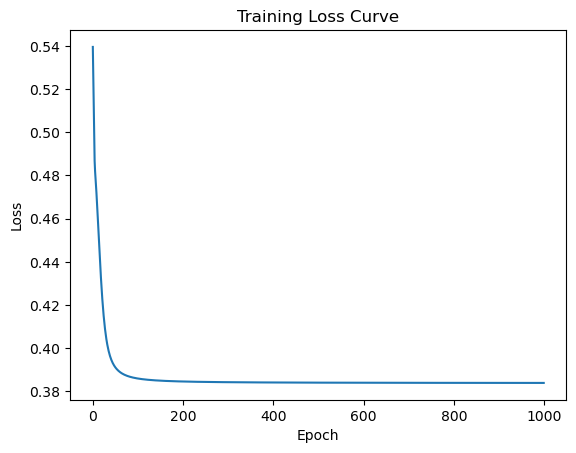

In [91]:
# Training loop
for epoch in range(epochs):
    loss = calc_loss(coeffs, t_indep, t_dep)
    loss.backward()
    update_coeffs(coeffs, lr)
    losses.append(loss.item())

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


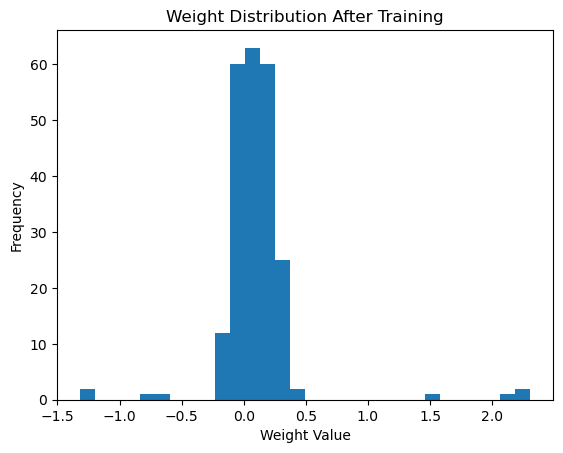

In [92]:
# Extract all weight values
weights = torch.cat([w.flatten() for w in coeffs[0]]).detach().numpy()

# Plot histogram
plt.hist(weights, bins=30)
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("Weight Distribution After Training")
plt.show()


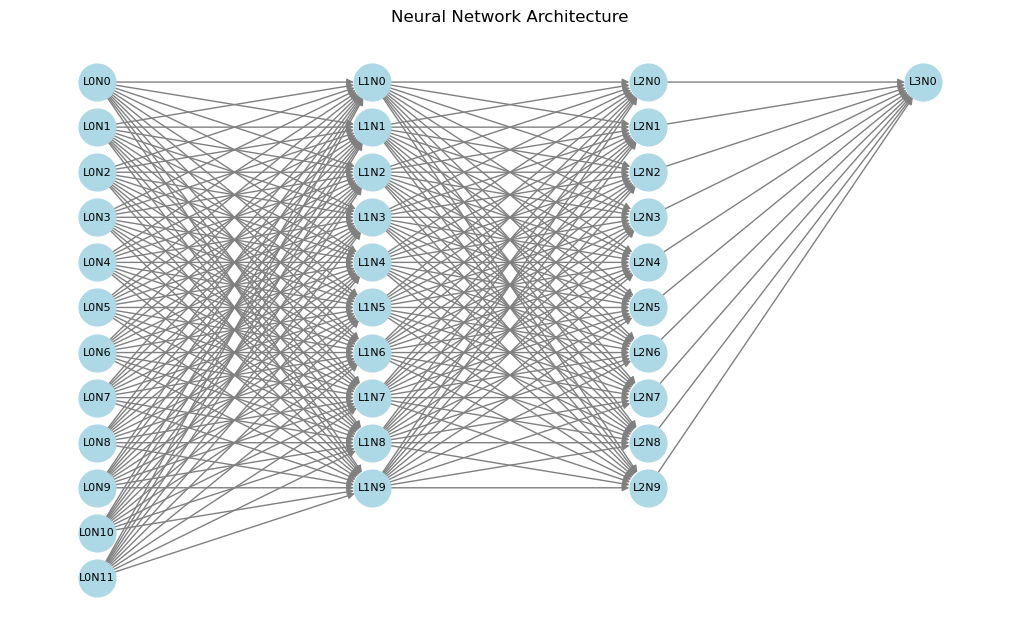

In [93]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_network_structure(n_coeffs, hidden=[10, 10], output=1):
    sizes = [n_coeffs] + hidden + [output]  # Layers sizes
    G = nx.DiGraph()  # Directed graph

    # Positioning nodes
    pos = {}  
    y_spacing = 2  # Spacing between layers
    x_spacing = 1  # Spacing between neurons

    node_count = 0
    layer_nodes = []  # Store nodes per layer for connecting later

    for layer_idx, size in enumerate(sizes):
        layer_nodes.append([])
        for neuron_idx in range(size):
            node_id = f"L{layer_idx}N{neuron_idx}"  # Unique ID for each neuron
            pos[node_id] = (layer_idx * y_spacing, -neuron_idx * x_spacing)
            G.add_node(node_id, layer=layer_idx)
            layer_nodes[-1].append(node_id)
            node_count += 1

    # Connect layers
    for i in range(len(layer_nodes) - 1):
        for src in layer_nodes[i]:  # Neurons from layer i
            for dst in layer_nodes[i+1]:  # Neurons from layer i+1
                G.add_edge(src, dst)  # Add connection

    # Draw the network
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color="gray", font_size=8)
    plt.title("Neural Network Architecture")
    plt.show()

# Call the function with your architecture
visualize_network_structure(n_coeffs=12)
